In [1]:
import sys
print('Python:{}'.format(sys.version))
import scipy 
print('scipy:{}'.format(scipy.__version__))
import numpy
print('numpy:{}'.format(numpy.__version__))
import matplotlib
print('matplotlib:{}'.format(matplotlib.__version__))
import pandas
print('pandas:{}'.format(pandas.__version__))
import sklearn
print('sklearn:{}'.format(sklearn.__version__))

Python:3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
scipy:1.1.0
numpy:1.14.3
matplotlib:2.2.2
pandas:0.23.0
sklearn:0.19.1


In [2]:
#load libraries
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)


In [4]:
# shape# shape
print(dataset.shape)


(150, 5)


In [6]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [7]:
print(dataset.head(5))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [8]:
#
#descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64
Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')


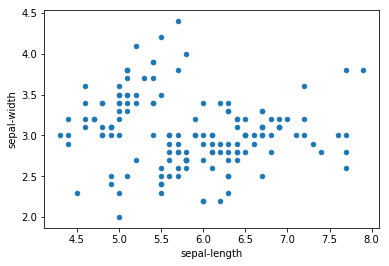

In [34]:
#class distribution
#We can see that each class has the same number of instances (50 or 33% of the dataset)
print(dataset.groupby('class').size())
print(dataset.columns)
dataset["class"].value_counts()
dataset.plot(kind='scatter',x='sepal-length',y='sepal-width')
plt.show()

We are going to look at two types of plots:

Univariate plots to better understand each attribute.
Multivariate plots to better understand the relationships between attributes.

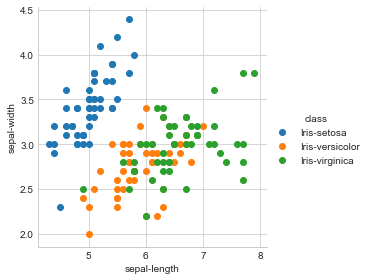

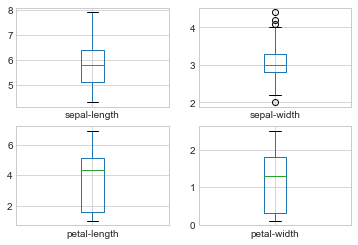

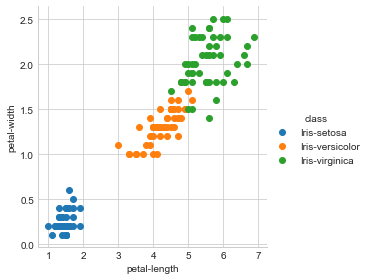

In [39]:
#box and whisker plots
import seaborn as sns
sns.set_style("whitegrid");
sns.FacetGrid(dataset,hue='class',size=4).map(plt.scatter,"sepal-length","sepal-width").add_legend();
plt.show()
dataset.plot(kind='box',subplots=True ,layout=(2,2),sharex=False,sharey=False)
plt.show()
sns.set_style("whitegrid");
sns.FacetGrid(dataset,hue='class',size=4).map(plt.scatter,"petal-length","petal-width").add_legend();
plt.show()

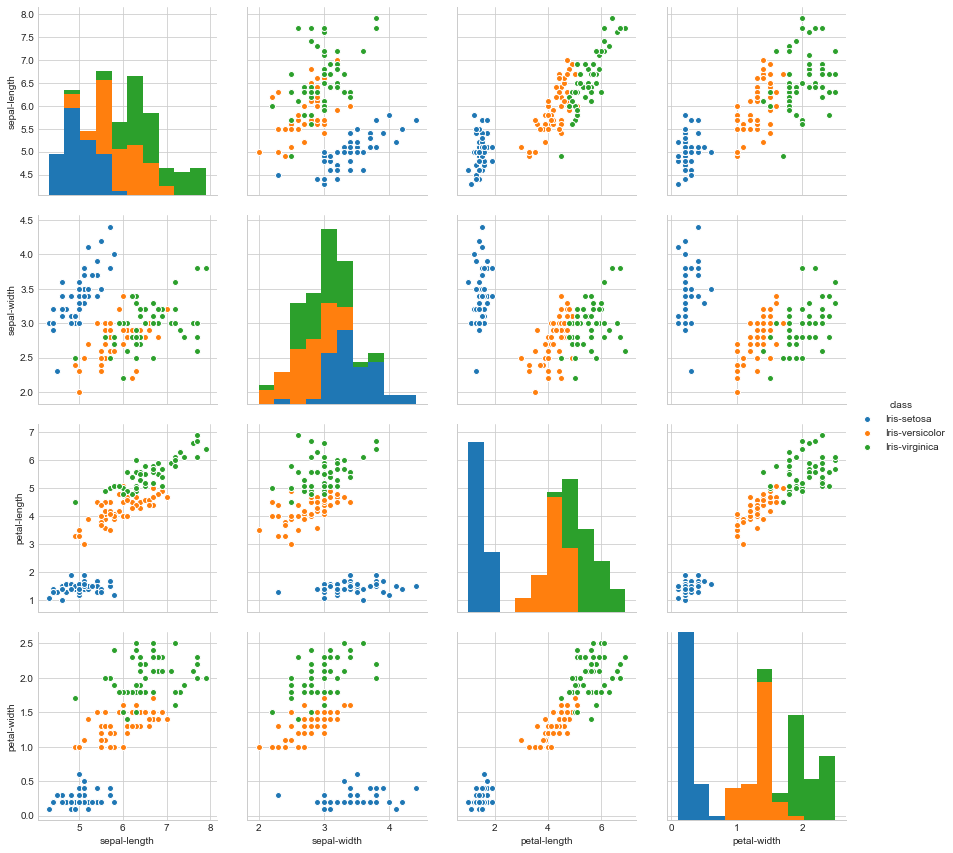

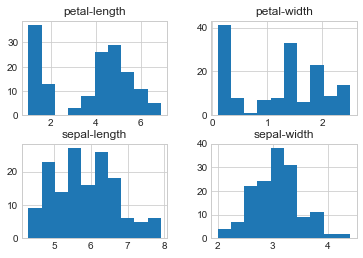

In [41]:
#Pair Plot
plt.close();
sns.set_style("whitegrid")
sns.pairplot(dataset,hue='class',size=3)
plt.show()
dataset.hist()
plt.show()

let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables

Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

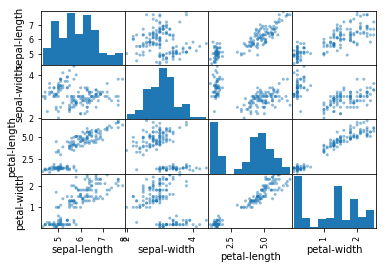

In [18]:
#scatter plot
scatter_matrix(dataset)
plt.show()

Now it is time to create some models of the data and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:

Separate out a validation dataset.
Set-up the test harness to use 10-fold cross validation.
Build 5 different models to predict species from flower measurements
Select the best model.

In [20]:
#split-out validation dataset
array = dataset.values
X=array[:,0:4]
Y= array[:,4]
validation_size=0.20
seed=7
X_train, X_validation,Y_train,Y_validation=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [21]:
#Test options and evaluation matric
seed=7
scoring = 'accuracy'

Let’s evaluate 6 different algorithms:

1.Logistic Regression (LR)

2.Linear Discriminant Analysis (LDA)

3.K-Nearest Neighbors (KNN).

4.Classification and Regression Trees (CART).

5.Gaussian Naive Bayes (NB).

6.Support Vector Machines (SVM).

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

In [22]:
#spot check algoriths
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)
